# Introduction

Playlists are essential for curating incredible parties, study sessions, and everything in-between requiring a consistent stream of music. Most of the work behind playlists lies in the song selection. And yes, it's incredibly important to pick the right tracks for the right vibe. The music is king at the end of the day. But, perhaps the most underrated detail that makes or breaks a playlist listening session is the song ordering within it. I think we've all been there– vibing to a song we love before rolling our eyes and sprinting to the "skip" button once the next track begins (even though we like both on their own). What a mood kill. It personally happens to me a lot on my mega playlists containing contrasting genres like classical music and pop/rap/EDM hits. Professional DJs consistently spend HOURS organizing their playlists and scheming up cool transitions so avet these undesireable flow breaks. 

Spoiler alert: not everyone has time for that. The current options for automating song ordering are surprisingly mediocre, too. Streaming giants like Spotify and Apple Music have offered features including "shuffle" and "smart shuffle". Respectively, these transitions randomly queue the next song and use AI to queue a song matching the original playlist's vibe (often importing tracks from outside the playlist altogether). 

I think we can create much better than some "random" orderings without manually organizing songs, wasting precious time that should be spent on enjoying the moment. I also think we can capture individuals' dynamic transition preferences without resorting to opaque, catch-all "AI" strategies that ordinary people don't understand under the hood. In this project, I aim to create an intuitive and customizable framework for ordering songs within a playlist. In doing so, I hope people can enjoy pressing "play" on all their playlists and trusting the music to flow as they would've wanted it. 

# Simplified Model Pipeline

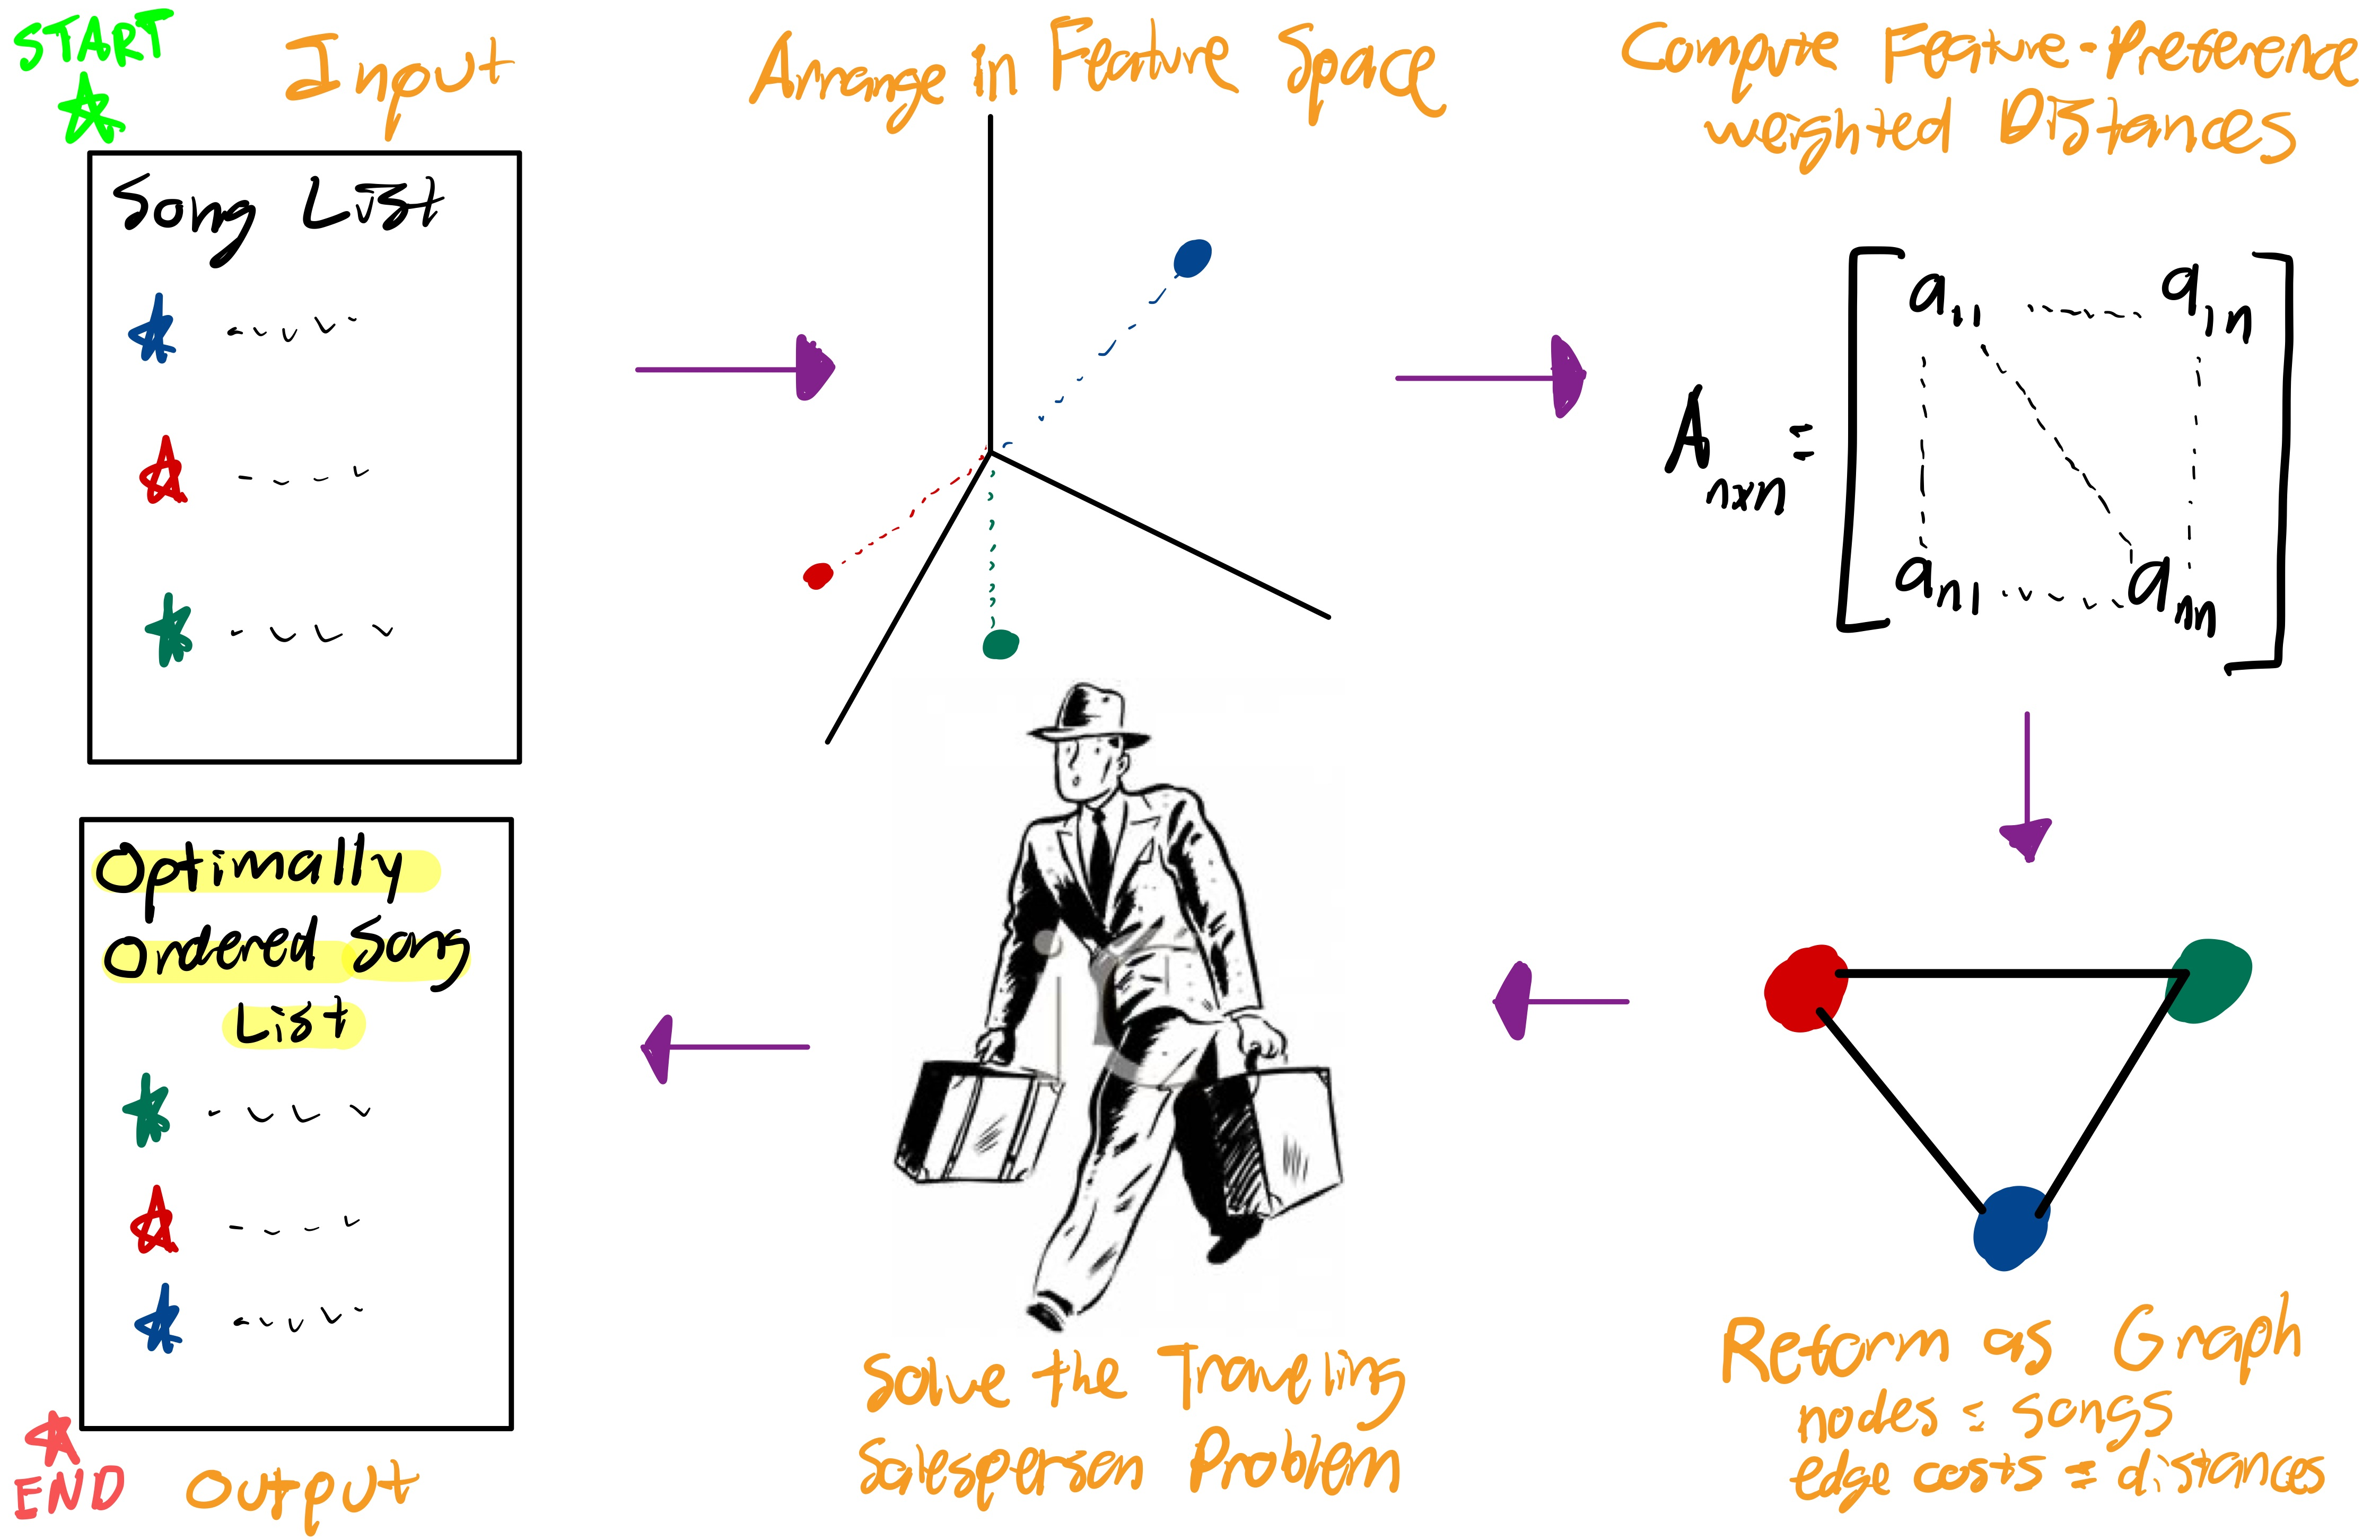

In [41]:
from IPython.display import Image, display

# Display the image
display(Image(filename='Pipeline.jpg'))

### Model Pipeline Explained

**Input**
- A list of songs (i.e. the playlist content)


**Arrange in Feature Space**
- Maps songs into $N$- dimensional space, where $N$ is the chosen number of relevant song features

- More on feature selection and interpretation in the data section


**Compute Feature-Preference Weighted Distances**
- Adds customizability by letting individuals prioritize feature alignent across successive songs

- Involves hyperparamter "sliders" for each of the $N$ features to indicate preference

- Produces a symmetric distance matrix whose entries are the preference weighted distances between tracks


**Reform as Graph**
- Nodes are the songs and edges link each song with each of the other songs (forming a fully-connected graph)

- Edge costs equal the preference-weighted distances from the distance matrix ($e_{ij} = a_{ij}$)


**Solving the Traveling Salesperson Problem (TSP):**
- A common problem in graph theory with some variants

- Yields the path that traverses every node while minimizing cumulative edge cost incurred

- My key assumption is that taking the "cheapest" path is analagous to choosing the "best" transitions


**Output:**
- The optimal order of nodes visited by the TSP expressed as an ordered song list

    - This list now provides the "optimal" order to play the songs in the playlist, per the features used and preferences indicated

- A numerical value respresenting the path cost of listening to the playlist 



# The Data

I used the "Spotify Tracks Dataset" created by Maharshi Pandya. Pandya used the handy Spotify API to scrape data on 114k songs across 100+ different genres. I think it looks fairly reliable, given my domain knowledge as a musician and its perfect Kaggle "Usability" score. Here's the link (hyperlinked): [Spotify Tracks Dataset on Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download)


The feature description from Pandya's Kaggle page is **copied and pasted** in the below:

## Features

`track_id`: The Spotify ID for the track

`artists`: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

`album_name`: The album name in which the track appears

`track_name`: Name of the track

`popularity`: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

`duration_ms`: The track length in milliseconds

`explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

`danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

`energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

`key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

`loudness`: The overall loudness of a track in decibels (dB)

`mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

`speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

`acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

`instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

`liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

`valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

`tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

`time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

`track_genre`: The genre in which the track belongs

## Load Dataset

In [42]:
import pandas as pd

# Load the dataset
song_data = pd.read_csv('song_data.csv')

# Display the first few rows of the dataframe
song_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Picking Songs For My Playlist

From my experience, one of the most fundamental distinctions in tonal music is the presence or absence of lyrics. To explore this, I created two playlists using some of my favorite songs in the dataset— one consisting of tracks with lyrics (e.g., pop, rap, country, EDM), and another featuring instrumental tracks (primarily classical music). I made sure to only include songs in different albums by different artists as to avoid special situations where a standard ordering of tracks exists purely due to the composer's intended narrative, rather than the genuine "best" transition possible.

Interestingly, despite this clear distinction along words, the `speechiness` feature shows little separation between the two playlists. This suggests potential limitations in how well `speechiness` captures lyrical content, and I'll exlude it from the $N$ features that users can express preferences over. The `instrumentalness` values separate the playlists much better, though, as expected.

My curated playlists will be helpful on multiple fronts, including:

- **Sensitivity analysis**: Observing how the addition of one or more tracks from the opposite playlist affects recommendation outcomes

- **Smoothness**: Enhancing the listening experience by reducing abrupt transitions— particularly between vocal and non-vocal tracks.

- **Confounder control**: Reducing the risk of confounding effects, such as differences between classical and contemporary music that may unknowingly correlate with other features (e.g. dynamics).

In [43]:
# Songs I like with words
words_ids = ['0IktbUcnAGrvD03AWnz3Q8', '5uU1uuyaUIBOiiUSQG7Wl3', '1XlpaijGmAY0pWe16oucrC', '3FQwvjvKnE3O4YKawVUNpA',
             '04aAxqtGp5pv12UXAg4pkq', '2ldAdghnrO34HPcZ0IWfTu', '4cktbXiXOapiLBMprHFErI', '228BxWXUYQPJrJYHDLOHkj',
             '6kex4EBAj0WHXDKZMEJaaF', '0RzEfVy07ukh7GxnwVjPmr', '7BqBn9nzAq8spo5e7cZ0dJ', '6uBhi9gBXWjanegOb2Phh0']

# Songs I like without words
nowords_ids = ['0ZNZQaiqvyrNYDrcZLMvLk', '1XA8XwmeBdMUdrcLIlxPTF', '17i5jLpzndlQhbS4SrTd0B', '2xizRhme7pYeITbH1NLLGt',
               '1nxjTDshyAJ98qJq0njCJS', '1RaWrq3YuSbG0zxcS4ODZg', '4k1gofu5MHXtsbqfikEzVq', '29S6PLRccSCyKozzwIik0J', 
               '1poKSG0QzW5oIIkBdiCcAR', '3pbMHrYR8i2qndIDhwtVBg', '6vsxQABOglnuZ2Nm5N831i', '4RADnYlgyRGpV7tWZJ5JiG']

words_df = song_data[song_data['track_id'].isin(words_ids)].drop_duplicates(subset='track_id')
nowords_df = song_data[song_data['track_id'].isin(nowords_ids)].drop_duplicates(subset='track_id')

In [44]:
# Show the songs I like with words 
print("Vocal songs I like:")
words_df[['artists', 'track_name', 'speechiness', 'instrumentalness']]

Vocal songs I like:


,artists,track_name,speechiness,instrumentalness
8,Jason Mraz;Colbie Caillat,Lucky,0.0369,0.000000
19652,Morgan Wallen,You Proof,0.0336,0.000000
20411,Jason Derulo;Nicki Minaj;Ty Dolla $ign,Swalla (feat. Nicki Minaj & Ty Dolla $ign),0.1090,0.000000
20424,Tiësto;Charli XCX,Hot in It,0.1770,0.000001
20750,Bruno Mars,Just the Way You Are,0.0422,0.000000
20751,Zedd;Alessia Cara,Stay,0.0622,0.000000
33023,Fall Out Boy,Centuries,0.0729,0.000000
51138,Lil Baby;Gunna,Drip Too Hard,0.2920,0.000000
53962,Afrojack;Wrabel,Ten Feet Tall,0.0644,0.000000
67353,Daddy Yankee,Gasolina,0.0614,0.000003


In [45]:
# Show the songs I like without words 
print("Non-vocal songs I like:")
nowords_df[['artists', 'track_name', 'speechiness', 'instrumentalness']]

Non-vocal songs I like:


,artists,track_name,speechiness,instrumentalness
4491,Philip Glass;Valentina Lisitsa,The Truman Show: Truman Sleeps - Short Version,0.0520,0.925
16020,Wolfgang Amadeus Mozart;Barry Tuckwell;English...,"Horn Concerto No. 4 in E flat, K.495: 3. Rondo...",0.0490,0.884
16120,Ludwig van Beethoven;Michael Barenboim;West-Ea...,"Violin Concerto in D Major, Op. 61: II. Larghetto",0.0509,0.112
16218,Camille Saint-Saëns;Alfons Kontarsky;Aloys Kon...,"Le carnaval des animaux, R. 125: IV. Tortues -...",0.0326,0.961
16245,Edvard Grieg;Gothenburg Symphony Orchestra;Nee...,"Peer Gynt Suite No. 1, Op. 46: 4. In The Hall ...",0.0546,0.691
16247,Johannes Brahms;Wiener Philharmoniker;Claudio ...,"21 Hungarian Dances, WoO 1: No. 5 in G Minor: ...",0.0349,0.968
16269,Sergei Rachmaninoff;Marko Stuparevic,"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....",0.0416,0.898
16418,Johann Sebastian Bach;Yo-Yo Ma,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",0.0636,0.842
16445,Georges Bizet;Francesco Verzillo;Danilo Dellep...,"Carmen: ""Habanera""",0.0576,0.969
16527,Pyotr Ilyich Tchaikovsky;André Previn;London S...,"Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10...",0.0364,0.916


# 1. Input

I preprocessed in "The Data" section already, but here are the inputs displayed (unordered playlists). The order in the dataframes was arbitrary, as it just matched the order in which I found and picked my favorite availible songs.

In [46]:
words_list = words_df['track_name'].tolist()
nowords_list = nowords_df['track_name'].tolist()

for i in range(len(words_list)):
    print(f"Song with words: {words_list[i]} - {words_df['artists'].iloc[i]}")
print("\n")
for i in range(len(nowords_list)):
    print(f"Song without words: {nowords_list[i]} - {nowords_df['artists'].iloc[i]}")


Song with words: Lucky - Jason Mraz;Colbie Caillat
Song with words: You Proof - Morgan Wallen
Song with words: Swalla (feat. Nicki Minaj & Ty Dolla $ign) - Jason Derulo;Nicki Minaj;Ty Dolla $ign
Song with words: Hot in It - Tiësto;Charli XCX
Song with words: Just the Way You Are - Bruno Mars
Song with words: Stay - Zedd;Alessia Cara
Song with words: Centuries - Fall Out Boy
Song with words: Drip Too Hard - Lil Baby;Gunna
Song with words: Ten Feet Tall - Afrojack;Wrabel
Song with words: Gasolina - Daddy Yankee
Song with words: Hey Ma (with J Balvin & Pitbull feat. Camila Cabello) - J Balvin;Pitbull;Camila Cabello
Song with words: Memories - Maroon 5


Song without words: The Truman Show: Truman Sleeps - Short Version - Philip Glass;Valentina Lisitsa
Song without words: Horn Concerto No. 4 in E flat, K.495: 3. Rondo (Allegro vivace) - Wolfgang Amadeus Mozart;Barry Tuckwell;English Chamber Orchestra
Song without words: Violin Concerto in D Major, Op. 61: II. Larghetto - Ludwig van Beethov

# 2. Arranging in Feature Space

## Helpful Features

There are 21 columns in the dataset. Far fewer are truly useful and comparable. As a French horn player, I actually think about the following features (and their root causes) while listening to and/or performing music:


`danceability`: helps me understand a piece's character in terms of danceability (impacts my phrasing on horn)

`loudness`: helps me guage a piece's volume (impacts my airflow on horn)

`energy`: helps me understand a piece's intensity (impacts my phrasing and airlow on horn)

`duration`: helps me know how long the piece is (impacts my endurance and resource budgeting on horn)

`key`: helps me understand the key signature and contextualize harmonic progressions

`mode`: helps me understand a piece's basic tonal "feel" (major/minor)

`acousticness`: helps me understand how "natural" the timbres in the song are (i.e. acoustic instruments versus electronically amplified, what type of sounds I should go for on horn)

`instrumentalness`: helps me determine whether a track is puely instrumental or containing vocals 

`valence`: I don't usually use this word, but I always think lots about the intended mood of a piece (impacts musical intent on horn)

`tempo`: helps me understand the (average) speed of the piece (impacts fingering, articulations, mental singing while playing horn)

`track_genre`: helps me categorize the piece within a family of 'similar' pieces (impacts the style I evoke on the horn)



### **THE $N$** Features

My goal is to have enough parameter controls to create orderings statisying the needs of partiers, locked-in students, and music listeners in-between. Maybe some people (partiers, probably) love when successive songs in their listening session are similarly danceable, long, or fast. Others (like students or background listeners) may prefer to maintain the emotional mood or stay within a genre for as long as possible. Most of us likely have preferences tuned across a wide range of parameters.

To balance simplicity in presentation and custom control expressibility, I've chosen to prioritize $N=8$ relevant song features: 
- `danceability`
- `duration`
- `mode`
- `acousticness`
- `instrumentalness`
- `valence`
- `tempo`
- `track_genre`

Making cuts from the longer list was difficult, but I'll explain my rationale. I frankly don't think people strictly care much about `loudness` between successive songs, assuming their audio player volume is in a comfortable range. `energy` is indicative of intensity, which I think is important but not as much as the $N$ chosen musical parameters. `key` is presented cardinally in terms of the number of semitones away from C natural that a piece's tonic lies. It's not really an attribute people care about across successive songs (outside of multimovement symphonic works, which I controlled for in my playlist generation) as much as the tonal "feel" captured by `mode`. 

In [47]:
# Our N=8 feature set
selected_columns = ['artists', 'track_name', 'danceability', 'duration_ms', 'mode', 
                    'acousticness', 'instrumentalness', 'valence', 'tempo', 'track_genre']

words_df = words_df[selected_columns]
nowords_df = nowords_df[selected_columns]


In [48]:
words_df.head()

,artists,track_name,danceability,duration_ms,mode,acousticness,instrumentalness,valence,tempo,track_genre
8,Jason Mraz;Colbie Caillat,Lucky,0.625,189613,1,0.29400,0.000000,0.669,130.088,acoustic
19652,Morgan Wallen,You Proof,0.731,157477,1,0.25200,0.000000,0.644,119.706,country
20411,Jason Derulo;Nicki Minaj;Ty Dolla $ign,Swalla (feat. Nicki Minaj & Ty Dolla $ign),0.696,216408,1,0.07500,0.000000,0.782,98.064,dance
20424,Tiësto;Charli XCX,Hot in It,0.748,129817,1,0.00445,0.000001,0.717,123.045,dance
20750,Bruno Mars,Just the Way You Are,0.635,220734,1,0.01340,0.000000,0.424,109.021,dance


In [49]:
nowords_df.head()

,artists,track_name,danceability,duration_ms,mode,acousticness,instrumentalness,valence,tempo,track_genre
4491,Philip Glass;Valentina Lisitsa,The Truman Show: Truman Sleeps - Short Version,0.266,160453,1,0.995,0.925,0.0631,94.861,ambient
16020,Wolfgang Amadeus Mozart;Barry Tuckwell;English...,"Horn Concerto No. 4 in E flat, K.495: 3. Rondo...",0.403,219226,1,0.993,0.884,0.5480,99.506,classical
16120,Ludwig van Beethoven;Michael Barenboim;West-Ea...,"Violin Concerto in D Major, Op. 61: II. Larghetto",0.115,576520,1,0.885,0.112,0.0386,175.598,classical
16218,Camille Saint-Saëns;Alfons Kontarsky;Aloys Kon...,"Le carnaval des animaux, R. 125: IV. Tortues -...",0.373,208360,1,0.975,0.961,0.1430,133.496,classical
16245,Edvard Grieg;Gothenburg Symphony Orchestra;Nee...,"Peer Gynt Suite No. 1, Op. 46: 4. In The Hall ...",0.406,178573,0,0.934,0.691,0.1970,94.292,classical


## Expressing Feature Preference

### Introducing Hyperparameters

Hyperparameters serve as intuitive “sliders” that let users customize how much each audio feature should influence transitions between songs. These values are directly proportional to their respective feature’s contribution in the overall squared weighted Euclidean distance.

I chose to constrain hyperparameters to the range $[0,5]$, which provides flexibility while allowing certain features to dominate the distance calculation (and thus the cost)if desired. *Higher values indicate a stronger preference for **similarity/smoothness** in that feature across adjacent tracks.*


Intuitively, features with larger weights contribute more to the total distance, which encourages the TSP solver to find a song ordering that minimizes large jumps in those specific characteristics.

In [50]:
# Customizable parameter preferences (all between [0,5] to allow for some features to dominate a bit)
# Base Case: Equal preference implied for all parameters, all set equal to 2.5 to represent a neutral preference set 
dance_param = 2.5           # w_1
duration_param = 2.5        # w_2
mode_param = 2.5            # w_3
acoustic_param = 2.5        # w_4 
instrumental_param = 2.5    # w_5
valence_param = 2.5         # w_6
tempo_param = 2.5           # w_7
genre_param = 2.5           # w_8   

# Combine all parameters into a list
hyperparams = [dance_param, duration_param, mode_param, acoustic_param, instrumental_param, valence_param, tempo_param, genre_param]

# 3. Distance Matrix

Let the matrix


$A = \begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1s} \\
a_{21} & a_{22} & \cdots & a_{2s} \\
\vdots & \vdots & \ddots & \vdots \\
a_{s1} & a_{s2} & \cdots & a_{ss}
\end{bmatrix}
\in \mathbb{R}^{s \times s} \text{  be our distance matrix, where s is the number of songs in the playlist.}
$


**Each entry $a_{ij}$ will contain the squared weighted Euclidean distance between songs $i$ and $j$.** We use squared weighted Euclidean distance so the hyperparameters proportionally impact their respective features' contributions to the distance metric. This is necessary since we break the square-root in conventional Euclidean distance to account for the *genre contribution* (see below). I use Euclidean distance over other norms because it provides the straight-line distance between points in feature space, aligning better with our intuitive understanding of similarity in multi-dimensional spaces.

### Categorical Variable Handling + Normalization

`track_genre` is a categorical feature, meaning it lacks cardinality and can't be directly compared to other genres numerically. To address this issue, I represent each genre by its nomalized aggregated feature profile– the rescaled means of all numerical variables across tracks within that genre. I then calculate the pairwise Euclidean distances between these normalized genre-level vectors, storing them in a genre distance matrix $D$. This process yields almost continuous embeddings for each category and enables meaningful comparisons of genre similarity based on their audio characteristics.

In [81]:
from scipy.spatial.distance import pdist, squareform

def compute_genre_distance_matrix(song_data):
    """
    Computes a normalized Euclidean distance matrix between genres based on
    the mean of numerical features for each genre in the dataset.

    Parameters:
        song_data (pd.DataFrame): Dataset containing a 'track_genre' column and numerical features.

    Returns:
        pd.DataFrame: A square distance matrix (genre x genre) with values in Euclidean space.
    """

    # Select numeric features
    numeric_features = song_data.select_dtypes(include='number').columns

    # Compute average feature values for each genre and normalize the genre profiles
    genre_profiles = song_data.groupby('track_genre')[numeric_features].mean()
    genre_profiles_normalized = (genre_profiles - genre_profiles.min()) / (genre_profiles.max() - genre_profiles.min())

    # Compute pairwise Euclidean distances between normalized genre profiles using pdist
    distance_array = pdist(genre_profiles_normalized.values, metric='euclidean')

    # Format as a square matrix using squareform
    genre_distance_matrix = pd.DataFrame(
        squareform(distance_array),
        index=genre_profiles.index,
        columns=genre_profiles.index
    )

    return genre_distance_matrix

genre_distance_matrix = compute_genre_distance_matrix(song_data)
print("Genre Euclidean distance matrix D using a feature-based categorical variable embedding:")
genre_distance_matrix


Genre Euclidean distance matrix D using a feature-based categorical variable embedding:


track_genre,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
track_genre,,,,,,,,,,,,,,,,,,,,,
acoustic,0.000000,0.991772,0.916687,0.873919,1.169543,0.775751,1.333407,0.605058,0.571459,0.641348,...,1.133164,1.531901,1.100874,1.208659,1.255192,1.531080,1.590926,1.358294,1.349570,1.189254
afrobeat,0.991772,0.000000,0.555517,0.492994,1.571750,0.639820,1.075177,0.756240,0.554605,0.715104,...,1.062247,1.394387,1.104173,1.111890,1.382829,1.226350,1.241241,1.064241,1.161420,1.456708
alt-rock,0.916687,0.555517,0.000000,0.240081,1.669867,0.579244,0.927967,0.739203,0.488721,0.504496,...,0.983571,1.602695,1.000877,1.111996,1.544161,1.257847,1.170216,1.158118,1.174013,1.265565
alternative,0.873919,0.492994,0.240081,0.000000,1.636057,0.596622,0.928660,0.718176,0.449342,0.554648,...,0.964593,1.537612,0.992982,1.067553,1.433807,1.275215,1.197353,1.138869,1.137122,1.283580
ambient,1.169543,1.571750,1.669867,1.636057,0.000000,1.289763,1.531416,1.380134,1.436541,1.466392,...,1.785245,1.405895,1.739845,1.785461,1.501741,1.725753,1.855668,1.611278,1.766290,1.595237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
techno,1.531080,1.226350,1.257847,1.275215,1.725753,1.161316,1.209989,1.453625,1.347512,1.254672,...,0.884731,1.100931,0.949889,0.860223,1.443163,0.000000,0.415245,0.461806,0.926928,0.998118
trance,1.590926,1.241241,1.170216,1.197353,1.855668,1.130798,1.138374,1.477386,1.346042,1.242244,...,0.839009,1.200558,0.909702,0.893488,1.471859,0.415245,0.000000,0.566203,0.833756,1.024309
trip-hop,1.358294,1.064241,1.158118,1.138869,1.611278,1.046817,1.281279,1.266352,1.139524,1.119959,...,0.628849,0.912883,0.681131,0.624355,1.052167,0.461806,0.566203,0.000000,0.580164,0.901724


### Normalizating Numerical Variables 

Normalization is an important step before distance calculation to make sure features with larger numerical ranges don’t dominate the results. It rescales all variables to the same range, allowing for apples-to-apples comparisons and preference weighting across features. I already normalized in the `track_genre` distance calculations above.

In [52]:
# Normalization function
def normalize(df): 
    return (df - df.min()) / (df.max() - df.min())


# Normalize function for dataframe
def df_normalizer(df):
    return normalize(df[numerical_columns])

# Create list of numerical columns to be normalized
numerical_columns = [
    col for col in selected_columns 
    if col not in ['track_genre', 'artists', 'track_name']
]

# Normalize the numerical columns in both playlist dataframes
words_df[numerical_columns] = df_normalizer(words_df[numerical_columns])
nowords_df[numerical_columns] = df_normalizer(nowords_df[numerical_columns])

### Calculate Preference-Weighted Distances on Normalized Variables

Now, we can use the normalized numerical feature value $x_i$, the chosen hyperparameter values $w_i$, and the Euclidean `track_genre` distance matrix $D$ to calculate **squared Euclidean distance**. As mentioned earlier, the elegance of this distance formula variant is *that changing our weights (preferences) via the hyperparameters **proportionally scales** the contribution of each feature’s difference to the overall distance.*



$\text{Squared-Euclidean-Distance}(\text{song}_1, \text{song}_2) = \left( \sum_{i=1}^{N-1} w_i \cdot (x_i^{(1)} - x_i^{(2)})^2 \right) + w_{N} \cdot \left(d_{\text{genre}}(\text{song}_1, \text{song}_2)\right)^2$


In [53]:
import numpy as np

def pref_weighted_distance(df, params, genre_distance_matrix):
    """
    Computes a pairwise squared preference-weighted distance matrix between songs in a playlist.

    Inputs:
        df (pd.DataFrame): DataFrame containing song features and metadata (one row per song).
            The DataFrame should include the following columns:

        params (list or array): A list of 8 numerical hyperparameters corresponding to user
            preference weights for each feature:
                [dance, duration, mode, acousticness, instrumentalness, valence, tempo, genre]

        genre_distance_matrix (pd.DataFrame): Precomputed symmetric matrix containing pairwise
            distances between genres, indexed and labeled by genre name 

    Output:
        A (pd.DataFrame): A square distance matrix (n x n) where entry (i, j) represents the
            squared preference-weighted Euclidean distance between song i and song j, based on
            both numerical features and genre similarity in the context of preferences. 
            Row/column labels are song titles.
    """

    n = len(df)
    A = np.zeros((n, n))  # Initialize squared preference-weighted Euclidean distance matrix

    for i in range(n):
        for j in range(n):
            song1 = df.iloc[i]
            song2 = df.iloc[j]

            # Look up genre distance between the two songs
            genre_dist = genre_distance_matrix.loc[song1['track_genre'], song2['track_genre']]

            # Compute preference-weighted squared difference for each feature
            dance        = params[0] * (song1['danceability']      - song2['danceability'])**2
            duration     = params[1] * (song1['duration_ms']       - song2['duration_ms'])**2
            mode         = params[2] * (song1['mode']              - song2['mode'])**2
            acoustic     = params[3] * (song1['acousticness']      - song2['acousticness'])**2
            instrumental = params[4] * (song1['instrumentalness']  - song2['instrumentalness'])**2
            valence      = params[5] * (song1['valence']           - song2['valence'])**2
            tempo        = params[6] * (song1['tempo']             - song2['tempo'])**2
            genre        = params[7] * (genre_dist)**2  # Square genre distance for consistency

            # Aggregate into total distance metric
            A[i, j] = dance + duration + mode + acoustic + instrumental + valence + tempo + genre

    # Return as DataFrame with track names as labels
    return pd.DataFrame(A, columns=df['track_name'], index=df['track_name'])

# Compute distance matrices for my playlists
A_words = pref_weighted_distance(words_df, hyperparams, genre_distance_matrix)
A_nowords = pref_weighted_distance(nowords_df, hyperparams, genre_distance_matrix)


Now I'll display $A_{words}$ and $A_{no\text{ }words}$

In [54]:
A_words

track_name,Lucky,You Proof,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Hot in It,Just the Way You Are,Stay,Centuries,Drip Too Hard,Ten Feet Tall,Gasolina,Hey Ma (with J Balvin & Pitbull feat. Camila Cabello),Memories
track_name,,,,,,,,,,,,
Lucky,0.000000,1.663075,3.285207,4.372191,3.829926,5.491412,5.987047,7.715070,5.025079,7.363132,6.392632,4.366140
You Proof,1.663075,0.000000,2.599320,2.283334,3.166647,4.640532,7.716138,5.760663,4.865823,4.963160,4.792721,4.280459
Swalla (feat. Nicki Minaj & Ty Dolla $ign),3.285207,2.599320,0.000000,2.826830,1.781958,3.373833,6.990266,6.715791,3.503414,3.786189,3.473589,4.327300
Hot in It,4.372191,2.283334,2.826830,0.000000,4.028544,5.543462,8.887890,5.312474,5.798969,3.026238,2.513549,6.078829
Just the Way You Are,3.829926,3.166647,1.781958,4.028544,0.000000,2.969384,5.669030,5.098183,0.706203,5.545660,3.251895,4.891917
Stay,5.491412,4.640532,3.373833,5.543462,2.969384,0.000000,3.852890,2.379859,4.141023,6.537740,5.507793,5.500783
Centuries,5.987047,7.716138,6.990266,8.887890,5.669030,3.852890,0.000000,6.641932,4.627311,12.287879,8.858292,10.098710
Drip Too Hard,7.715070,5.760663,6.715791,5.312474,5.098183,2.379859,6.641932,0.000000,5.908773,8.301957,6.333452,6.415974
Ten Feet Tall,5.025079,4.865823,3.503414,5.798969,0.706203,4.141023,4.627311,5.908773,0.000000,7.303203,3.931046,5.316722


In [55]:
A_nowords

track_name,The Truman Show: Truman Sleeps - Short Version,"Horn Concerto No. 4 in E flat, K.495: 3. Rondo (Allegro vivace)","Violin Concerto in D Major, Op. 61: II. Larghetto","Le carnaval des animaux, R. 125: IV. Tortues - V. L'Éléphant - VI. Kangourous","Peer Gynt Suite No. 1, Op. 46: 4. In The Hall Of The Mountain King","21 Hungarian Dances, WoO 1: No. 5 in G Minor: Allegro","Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato","Cello Suite No. 1 in G Major, BWV 1007: I. Prélude","Carmen: ""Habanera""","Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10, Scene. Moderato","Das Lied von der Erde: No. 2, Der Einsame im Herbst",Richard Wagner / Die Meistersinger von Nürnberg - Overture
track_name,,,,,,,,,,,,
The Truman Show: Truman Sleeps - Short Version,0.000000,3.402104,9.293154,1.766758,5.034879,5.353652,2.543227,4.059148,4.319260,5.598094,6.546419,3.951547
"Horn Concerto No. 4 in E flat, K.495: 3. Rondo (Allegro vivace)",3.402104,0.000000,10.011144,1.659291,4.383200,1.845723,2.972360,3.057891,0.490626,6.957377,7.468861,3.472377
"Violin Concerto in D Major, Op. 61: II. Larghetto",9.293154,10.011144,0.000000,6.813231,8.284913,9.620776,6.591952,6.569282,11.720245,9.183278,6.200829,5.029795
"Le carnaval des animaux, R. 125: IV. Tortues - V. L'Éléphant - VI. Kangourous",1.766758,1.659291,6.813231,0.000000,3.421451,3.286603,1.572612,2.562267,1.852909,5.114370,5.844393,2.460435
"Peer Gynt Suite No. 1, Op. 46: 4. In The Hall Of The Mountain King",5.034879,4.383200,8.284913,3.421451,0.000000,4.291479,4.819712,3.364972,4.965881,1.521791,3.487833,5.399773
"21 Hungarian Dances, WoO 1: No. 5 in G Minor: Allegro",5.353652,1.845723,9.620776,3.286603,4.291479,0.000000,5.473373,0.861093,2.649021,5.425203,9.963860,4.682746
"Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato",2.543227,2.972360,6.591952,1.572612,4.819712,5.473373,0.000000,4.135772,4.069861,5.693744,3.563585,0.721552
"Cello Suite No. 1 in G Major, BWV 1007: I. Prélude",4.059148,3.057891,6.569282,2.562267,3.364972,0.861093,4.135772,0.000000,4.304747,3.331043,7.727940,3.581864
"Carmen: ""Habanera""",4.319260,0.490626,11.720245,1.852909,4.965881,2.649021,4.069861,4.304747,0.000000,8.804450,9.463714,4.978878


# 4. Reform as Graph

It's quite simple to take the distance matrix and process it into an undirected graph $G = (V,E)$, where $V$ is the set of songs in our unordered input list and $E$ is the set of edges connecting $u, v \in V$ (where $u \neq v$). The key connection to the prior step is that our **edge cost equals the weighted squared Euclidean distance** between the pair of nodes sharing the edge. Again, I assume that a high distance reflects less similarity between songs along the desired parameters, and thus marks an "expensive" transition relative to others between more similar songs.

In [56]:
import networkx as nx

def matrix_to_graph(distance_df):
    """
    Converts a distance matrix into a fully connected undirected graph.

    Parameters:
        distance_df (pd.DataFrame): Square DataFrame with distances

    Returns:
        networkx.Graph: Fully connected graph with weighted edges
    """
    G = nx.Graph()

    # Add all edges for i != j
    for i in distance_df.index:
        for j in distance_df.columns:
            if i != j:
                weight = distance_df.loc[i, j]
                G.add_edge(i, j, weight=weight)

    return G

In [57]:
G_words = matrix_to_graph(A_words)
G_nowords = matrix_to_graph(A_nowords)

Below I'll display some visualizations of the fully connected graphs 

Note that the thickness of edges corresponds to the edge cost, with higher thickness indicating a closer distance between the songs sharing the edge.

In [58]:
import matplotlib.pyplot as plt

def draw_track_graph(G, title="Track Distance Graph", layout='circular'):
    """
    Visualizes a fully connected track graph where edge weights represent distances.

    Inputs:
        G (networkx.Graph): Graph object (e.g., G_words)
        title (str): Title 
        layout (str): Layout algorithm to use ('spring', 'circular', 'kamada')
    """
    # Choose layout
    if layout == 'spring':
        pos = nx.spring_layout(G, seed=42)
    elif layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G)

    # Extract weights from graph
    edge_weights = nx.get_edge_attributes(G, 'weight')
    max_weight = max(edge_weights.values())
    
    # Invert weights for visualization (thicker edge = more similarity)
    widths = [3 * (1 - (w / max_weight)) for w in edge_weights.values()]

    # Draw graph
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)
    nx.draw_networkx_labels(G, pos, font_size=7)

    nx.draw_networkx_edges(
        G, pos,
        edgelist=edge_weights.keys(),
        width=widths,
        edge_color='gray',
        alpha=0.6
    )

    plt.title(title)
    plt.axis('off')
    plt.show()

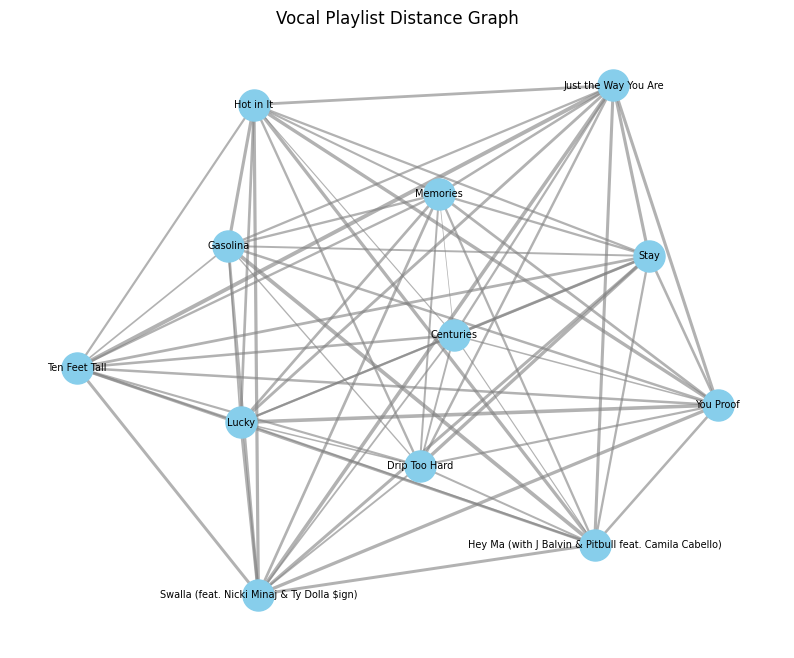

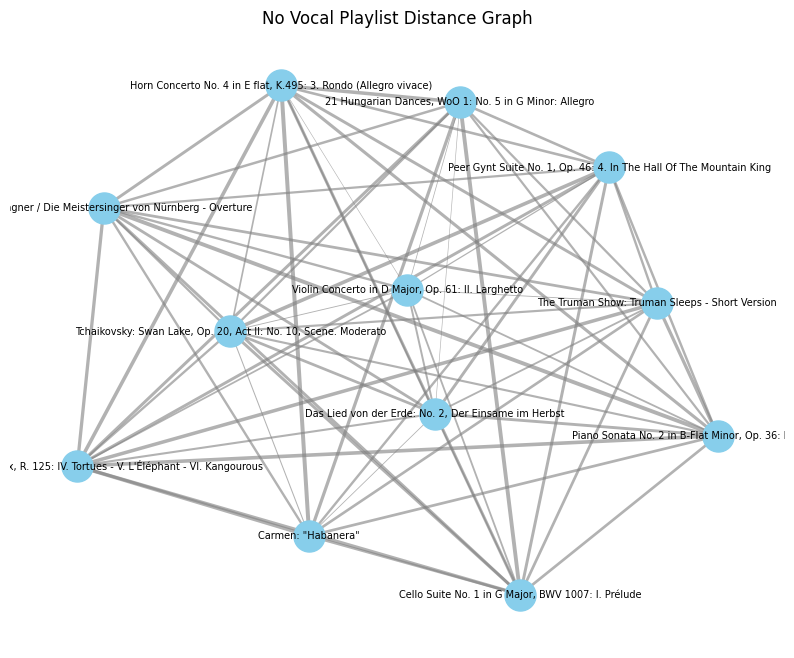

In [82]:
draw_track_graph(G_words, title="Vocal Playlist Distance Graph", layout='spring')
draw_track_graph(G_nowords, title="No Vocal Playlist Distance Graph", layout='spring')


# 5. Solve the Traveling Salesperson Problem (TSP)

The Traveling Salesman Problem (TSP) seeks the optimal path through a graph $G$ that visits every node exactly once and returns to the starting point— similar to how a playlist completely loops over time without skipping or repeating interior songs. I use NetworkX’s approximation algorithm to compute a near-optimal ordering of songs solving the TSP. I also calculate the total path cost, which provides a useful **cardinal measure** of the ordering’s overall smoothness or cohesiveness based on the user's preferences.

Setting `cycle=True` ensures that the playlist forms a closed loop, returning to the starting song — similar to how most streaming platforms behave when looping is enabled. This structure allows users to begin playback on **any** song in the cycle while maintaining smooth transitions in either direction, making the order flexible and user-centric.

While setting `cycle=False` might yield slightly smoother transitions in a linear sense, it restricts the user to a specific start and end point. The lack of a return-to-start edge means the loop is not closed — reducing flexibility if users want to start playback mid-sequence. *That’s why **I solve the TSP with the cycle assumption**, as it balances smoothness with practical usability.*



In [60]:
def solve_tsp(G, cycle=True):
    """
    Solves the TSP using NetworkX's approximation algorithm.
    Ensures:
    - No internal node duplicates
    - Optional return to start (cycle=True)
    - Correct path cost calculation

    Parameters:
        G (networkx.Graph): Fully connected graph with weighted edges.
        cycle (bool): If True, allows return to start (cycle). Otherwise, returns an open path.

    Returns:
        tsp_path (list): Ordered list of nodes (no internal duplicates).
        tsp_cost (float): Total cost of the tour.
    """
    tsp_raw = nx.approximation.traveling_salesman_problem(G, weight='weight', cycle=cycle)

    # Check if solver returned a cycle
    is_explicit_cycle = tsp_raw[0] == tsp_raw[-1]

    # Remove internal duplicates but preserve order (allow duplicated start at end)
    seen = set()
    tsp_path = []

    for i, node in enumerate(tsp_raw):
        if i == len(tsp_raw) - 1 and is_explicit_cycle:
            tsp_path.append(node)  # allow return to start
        elif node not in seen:
            seen.add(node)
            tsp_path.append(node)

    # Remove closing node for cost computation if it's a cycle
    path = tsp_path[:-1] if is_explicit_cycle else tsp_path

    # Final validation
    if len(set(path)) != len(path):
        raise ValueError("TSP result contains internal duplicate nodes.")

    # Compute total path cost
    tsp_cost = sum(G[u][v]['weight'] for u, v in zip(path, path[1:]))

    if is_explicit_cycle:
        tsp_cost += G[path[-1]][path[0]]['weight']  # add return edge
        print("Cycle detected in TSP solution. Cost includes return to start.")

    return path, tsp_cost


In [61]:
# Solve TSP for words and nowords graphs
path_words, cost_words = solve_tsp(G_words)
path_nowords, cost_nowords = solve_tsp(G_nowords)

Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.


# 6. Output

I simply print out the "optimal" ordering and path cost for each playlist, as determined by TSP solver results on a graph dictated by the user's song selection and transition preferences.

In [62]:
print("Words Playlist (TSP Order):")
for i, track in enumerate(path_words, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_words)

print("\nNo-Words Playlist (TSP Order):")
for i, track in enumerate(path_nowords, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_nowords)

Words Playlist (TSP Order):
1. Lucky
2. Centuries
3. Stay
4. Drip Too Hard
5. Just the Way You Are
6. Ten Feet Tall
7. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
8. You Proof
9. Memories
10. Gasolina
11. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
12. Hot in It
Total distance: 41.86840110179075

No-Words Playlist (TSP Order):
1. The Truman Show: Truman Sleeps - Short Version
2. Le carnaval des animaux, R. 125: IV. Tortues - V. L'Éléphant - VI. Kangourous
3. Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato
4. Richard Wagner / Die Meistersinger von Nürnberg - Overture
5. Violin Concerto in D Major, Op. 61: II. Larghetto
6. Das Lied von der Erde: No. 2, Der Einsame im Herbst
7. Peer Gynt Suite No. 1, Op. 46: 4. In The Hall Of The Mountain King
8. Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10, Scene. Moderato
9. Cello Suite No. 1 in G Major, BWV 1007: I. Prélude
10. 21 Hungarian Dances, WoO 1: No. 5 in G Minor: Allegro
11. Horn Concerto No. 4 in E flat, K.495: 3. R

Just as an interesting note, these **optimal** playlist orderings can be shifted depending on the user’s preferred starting point. In the process so far, the user (me) doesn’t care which song plays at what time. But suppose a user **does** care. Then, they can ensure a specific track plays first simply by starting the playlist at a different point in the TSP tour. 

Because the TSP solution forms a cycle, the total path cost remains unchanged as long as the order of tracks is preserved and all songs are visited. This offers an easy way to customize the playlist's starting point (or penultimate, mid, etc. point) without sacrificing overall cohesiveness.


# Sensitivity Analysis

## Playlist Content

### Song Swaps

I want to see the sensitivity of my model to a few songs being swapped between my playlists

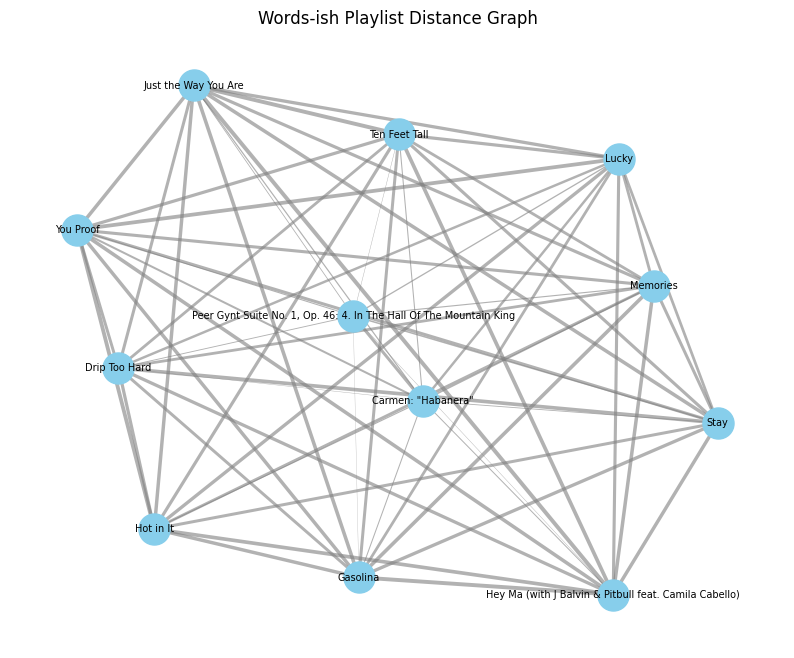

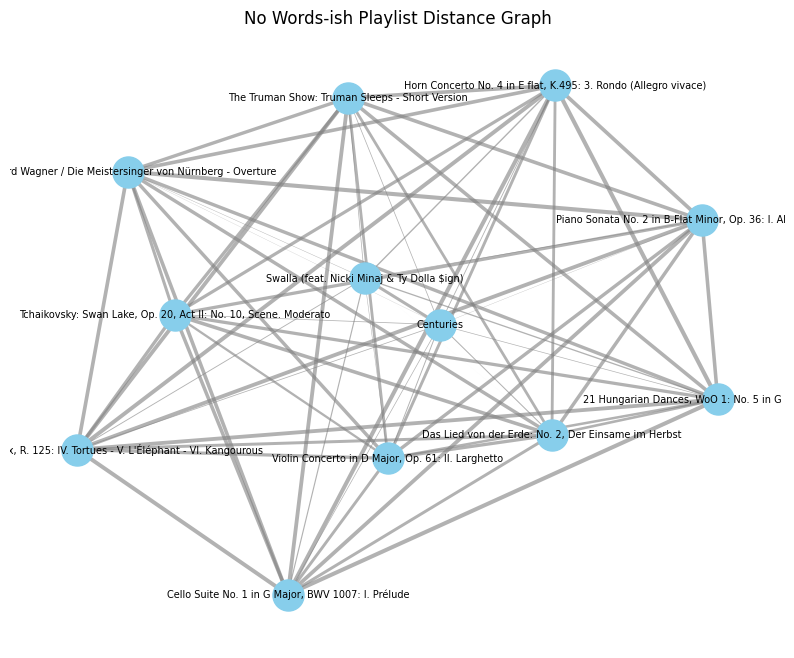

In [63]:
import random

# Make copies so the original lists stay unchanged
words_ids_swapped = words_ids.copy()
nowords_ids_swapped = nowords_ids.copy()

# Swap two random pairs
for swap_num in range(2):
    i = random.randint(0, len(words_ids_swapped) - 1)
    j = random.randint(0, len(nowords_ids_swapped) - 1)
    words_ids_swapped[i], nowords_ids_swapped[j] = nowords_ids_swapped[j], words_ids_swapped[i]

# Same preprocess as before 
wordsish_df = song_data[song_data['track_id'].isin(words_ids_swapped)].drop_duplicates(subset='track_id')
nowordsish_df = song_data[song_data['track_id'].isin(nowords_ids_swapped)].drop_duplicates(subset='track_id')
wordsish_df = wordsish_df[selected_columns]
nowordsish_df = nowordsish_df[selected_columns]
wordsish_df[numerical_columns] = df_normalizer(wordsish_df[numerical_columns])
nowordsish_df[numerical_columns] = df_normalizer(nowordsish_df[numerical_columns])
# Compute distance matrices for words and no-words playlists
A_wordsish = pref_weighted_distance(wordsish_df, hyperparams, genre_distance_matrix)
A_nowordsish = pref_weighted_distance(nowordsish_df, hyperparams, genre_distance_matrix)
G_wordsish = matrix_to_graph(A_wordsish)
G_nowordsish = matrix_to_graph(A_nowordsish)
draw_track_graph(G_wordsish, title="Words-ish Playlist Distance Graph", layout='spring')
draw_track_graph(G_nowordsish, title="No Words-ish Playlist Distance Graph", layout='spring')


In [64]:
path_wordsish, cost_wordsish = solve_tsp(G_wordsish)
path_nowordsish, cost_nowordsish = solve_tsp(G_nowordsish)

Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.


In [65]:
print("Words-ish Playlist (TSP Order):")
for i, track in enumerate(path_wordsish, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_wordsish)
print("\nNo-Words-ish Playlist (TSP Order):")
for i, track in enumerate(path_nowordsish, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_nowordsish)

Words-ish Playlist (TSP Order):
1. Lucky
2. Carmen: "Habanera"
3. Peer Gynt Suite No. 1, Op. 46: 4. In The Hall Of The Mountain King
4. Stay
5. Drip Too Hard
6. Just the Way You Are
7. Ten Feet Tall
8. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
9. Memories
10. Gasolina
11. Hot in It
12. You Proof
Total distance: 48.49010737496102

No-Words-ish Playlist (TSP Order):
1. The Truman Show: Truman Sleeps - Short Version
2. Centuries
3. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
4. Horn Concerto No. 4 in E flat, K.495: 3. Rondo (Allegro vivace)
5. 21 Hungarian Dances, WoO 1: No. 5 in G Minor: Allegro
6. Cello Suite No. 1 in G Major, BWV 1007: I. Prélude
7. Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10, Scene. Moderato
8. Das Lied von der Erde: No. 2, Der Einsame im Herbst
9. Violin Concerto in D Major, Op. 61: II. Larghetto
10. Richard Wagner / Die Meistersinger von Nürnberg - Overture
11. Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato
12. Le carnaval des animaux, 

Both path costs increased, but the jump was higher for the playlist originally containing instrumental songs. Perhaps that suggests vocal tracks are more out of place in playlists with instrumental tracks than instrumental tracks are in playlists with vocal tracks. I'd need to do more rigorous analysis to prove that, though, as it could just be a result of the random swap rather than a true pattern.

Interestingly, and perhaps as expected, the songs that got swapped remained neighbors in their new playlist likely due to their sonic similarities under my base parameter regime. The stationary song ordering did get a little bit more mixed up than I would've liked, but the ones that moved in the orderings usually maintained at least one neighbor from before.

### Song Additions

I now want to see the sensitivity of my model to a large disruption in the original playlists. I thought combining both of my playlists into a mega playlist containing vocal and nonvocal tracks would be an intuitive way to test it out.

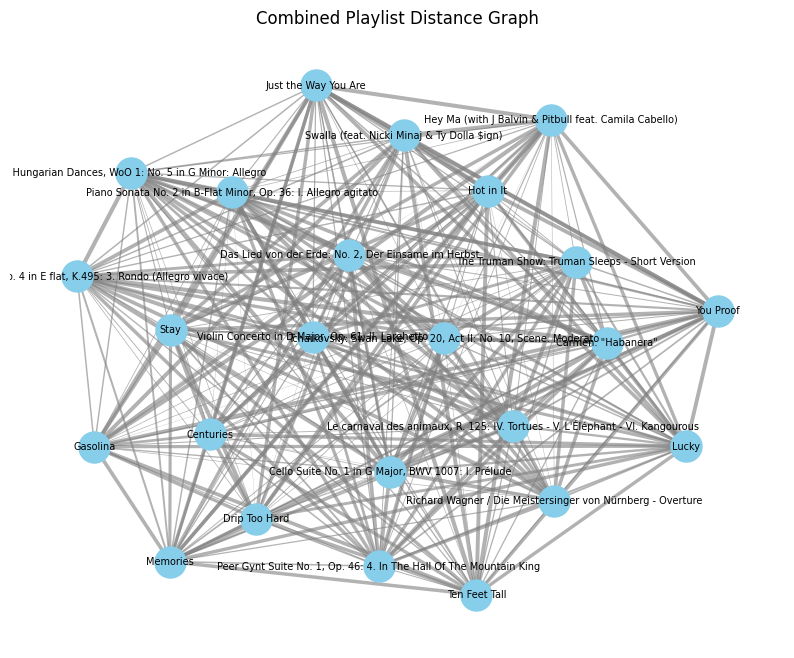

Cycle detected in TSP solution. Cost includes return to start.


In [66]:
combined_ids = words_ids + nowords_ids
combined_df = song_data[song_data['track_id'].isin(combined_ids)].drop_duplicates(subset='track_id')
combined_df = combined_df[selected_columns]
combined_df[numerical_columns] = df_normalizer(combined_df[numerical_columns])
# Compute distance matrices for combined playlist
A_combined = pref_weighted_distance(combined_df, hyperparams, genre_distance_matrix)
G_combined = matrix_to_graph(A_combined)
draw_track_graph(G_combined, title="Combined Playlist Distance Graph", layout='spring')
# Solve TSP for combined graph
path_combined, cost_combined = solve_tsp(G_combined)

In [67]:
for i, track in enumerate(path_combined, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_combined)

1. Lucky
2. Horn Concerto No. 4 in E flat, K.495: 3. Rondo (Allegro vivace)
3. Carmen: "Habanera"
4. Le carnaval des animaux, R. 125: IV. Tortues - V. L'Éléphant - VI. Kangourous
5. The Truman Show: Truman Sleeps - Short Version
6. Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato
7. Richard Wagner / Die Meistersinger von Nürnberg - Overture
8. Violin Concerto in D Major, Op. 61: II. Larghetto
9. Das Lied von der Erde: No. 2, Der Einsame im Herbst
10. Peer Gynt Suite No. 1, Op. 46: 4. In The Hall Of The Mountain King
11. Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10, Scene. Moderato
12. Cello Suite No. 1 in G Major, BWV 1007: I. Prélude
13. 21 Hungarian Dances, WoO 1: No. 5 in G Minor: Allegro
14. Memories
15. Gasolina
16. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
17. Just the Way You Are
18. Stay
19. Drip Too Hard
20. Centuries
21. Ten Feet Tall
22. Hot in It
23. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
24. You Proof
Total distance: 55.27089769093482


The optimal combined playlist ordering clusters cleanly into contiguous blocks of vocal and non-vocal tracks. This outcome is somewhat expected and mirrors the behavior seen in the small perturbation case, where transitions between dissimilar track types remained costly. Notably, the relative orderings of vocal and non-vocal tracks remain similar to those in the base case with two separate playlists, even under a large perturbation. This suggests that my model becomes *less sensitive to individual changes* once many consistent, similar changes are introduced — a sign of *robust behavior under structured variation*.

Even more interestingly, the total path cost of the optimal combined playlist is **significantly lower** than the sum of the path costs of the individual playlists. This is a fantastic result from the sensitivity analysis: it suggests that the model **performs better** when applied under a consistent parameter regime to **larger and more diverse** sets of songs. Rather than simply aggregating inefficiencies, the model appears to find smoother transitions and more efficient pathways when given a broader search space.


### Noisy Playlist Content

I want to examine how my model performs on randomly generated playlists of 24 songs

In [ ]:
# Generate 1000 samples of size 24 (no replacement since it screws up the TSP)
bootstrap_costs = []
num_samples = 1000
sample_size = 24

for _ in range(num_samples):
    # Randomly sample 24 unique tracks
    bootstrap_sample_ids = random.sample(song_data['track_id'].tolist(), sample_size)
    clean_song_data = song_data.dropna()
    bootstrap_sample_df = clean_song_data.drop_duplicates(subset='track_id').sample(n=sample_size, replace=False)
    bootstrap_sample_df = bootstrap_sample_df[selected_columns]
    bootstrap_sample_df[numerical_columns] = df_normalizer(bootstrap_sample_df[numerical_columns])
    
    # Compute distance matrix and graph
    A_bootstrap = pref_weighted_distance(bootstrap_sample_df, hyperparams, genre_distance_matrix)
    G_bootstrap = matrix_to_graph(A_bootstrap)
    
    # Solve TSP and store the cost if possible and handle errors
    try:
        _, cost_bootstrap = solve_tsp(G_bootstrap)
        bootstrap_costs.append(cost_bootstrap)
    except ValueError as e:
        print(f"Sample skipped due to error: {e}")

Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to start.
Cycle detected in TSP solution. Cost includes return to

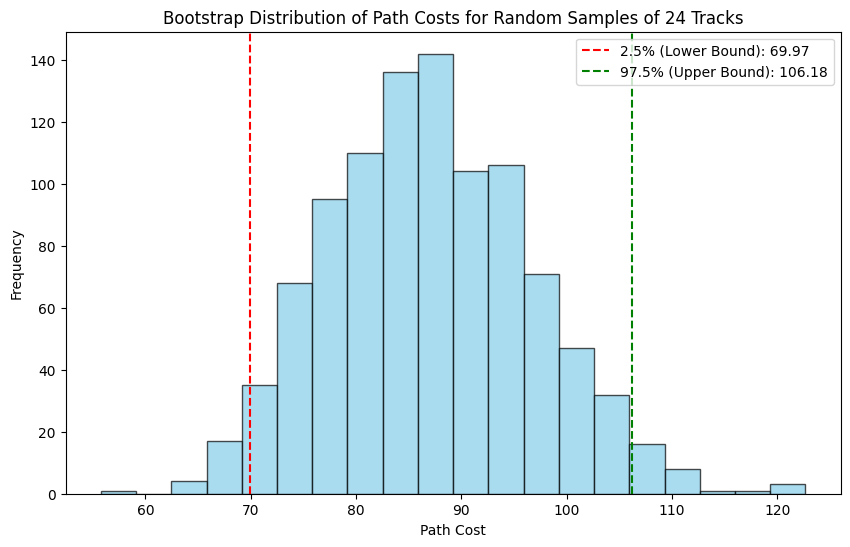

95% Confidence Interval for Ideal Path Cost with 24 Random Songs: [69.97, 106.18]


In [69]:
# Calculate 95% confidence interval for path cost
lower_bound = np.percentile(bootstrap_costs, 2.5)
upper_bound = np.percentile(bootstrap_costs, 97.5)

# Plot distribution of path costs
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_costs, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='--', label=f'2.5% (Lower Bound): {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'97.5% (Upper Bound): {upper_bound:.2f}')
plt.title('Bootstrap Distribution of Path Costs for Random Samples of 24 Tracks')
plt.xlabel('Path Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"95% Confidence Interval for Ideal Path Cost with 24 Random Songs: [{lower_bound:.2f}, {upper_bound:.2f}]")

This confidence interval suggests that curating a playlist can drastically improve the optimal listening experience, as my contrasting but curated songs from the previous section had a statistically significant path cost relative to random samples. This confirms that music choice really matters, as we all know. It's unlikely to get an amazing listening experience (in terms of smooth transitions) with tons of disjointed songs, so users of my model should make sure to be diligent about the tracks they're picking!

## Hyperparameter Values

Up till now, I've presented results and sensitivites under the base hyperparameter setting indicating neutral preference (each $w_i$ = 2.5 to lie in the middle of its permissible range, but there are multiple possible base settings so long as all the $w_i \text{s}$ are equal). There are $N=8$ hyperparameters, and I think it would be futile to exhaustively start adjusting them. I'll analyze the parameter sensitivity simply by getting back to the motivation for the project: examining how different sets of preferences can translate into "ideal" playlist orderings.


Let's say I'm on a road trip with my 3 friends. Here's some background on each of us:
- Jake is in his feels. He cares lots about maintaining the emotional mood and genre, much less about everything else

- Stacy has OCD. She cares lots about smoothening the timbre (acousticness) and tempo changes across successive songs, less about everything else

- I'm a party animal. I deeply and exclusively care about matching adjacent songs based on their danceability and emotional mood (to a lesser extent)

- Riya thinks elevator music is cool. She cares decently about maintaining modality and lots about keeping successive pieces at similar durations, and moderately about everything else.


Since we're all friends, our road trip parameter settings will be the average of our personal settings. I will solely examine the discrepancy between the group and individual orderings on my original playlist with vocals, as we like singing along to songs together on road trips. 

In [70]:
# hyperparams = [dance_param, duration_param, mode_param, acoustic_param, instrumental_param, valence_param, tempo_param, genre_param]

# Individual user preferences
jake_params = [1.5, 1.5, 1.5, 1.5, 1.5, 5, 1.5, 5]
stacy_params = [2.5, 2.5, 2.5, 5, 2.5, 2.5, 5, 2.5]
rosh_params = [5, 0, 0, 0, 0, 3.5, 0, 0]
riya_params = [3, 5, 4, 3, 3, 3, 3, 3]

# Average user preferences for road trip
road_trip_params = np.mean([jake_params, stacy_params, rosh_params, riya_params], axis=0).tolist()
print("Road Trip Parameters:", road_trip_params)

Road Trip Parameters: [3.0, 2.25, 2.0, 2.375, 1.75, 3.5, 2.375, 2.625]


In [71]:
import seaborn as sns

def print_tsp_costs_for_params(df, params, genre_distance_matrix, name):
    """
    Computes the TSP cost for a given set of parameters, prints the optimal order,
    and shows a heatmap of the selected features.

    Parameters:
        df (pd.DataFrame): DataFrame containing song features and metadata.
        params (list): List of feature column names to use.
        genre_distance_matrix (pd.DataFrame): Precomputed genre distance matrix.
        name (str): Label for this configuration
    """
    # Build full distance matrix
    A = pref_weighted_distance(df, params, genre_distance_matrix)
    G = matrix_to_graph(A)
    path, cost = solve_tsp(G)

    # Print the optimal track order
    print("\nOptimal Order for", name)
    for i, track in enumerate(path, 1):
        print(f"{i}. {track}")
    print("Total distance:", cost, "\n")

    # Reorder DataFrame according to TSP path
    ordered_df = df.set_index("track_name").loc[path].reset_index()
    
    # Plot heatmap of feature values
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(
        ordered_df[numerical_columns],
        cmap='coolwarm',
        cbar=True,
        xticklabels=True,
        yticklabels=[str(i) for i in range(1, len(ordered_df) + 1)]
    )
    plt.title(f"Normalized Feature Heatmap for {name} Playlist Ordering")
    plt.xlabel("Features")
    plt.ylabel("TSP Order (1=First)")
    plt.tight_layout()
    plt.show()



Cycle detected in TSP solution. Cost includes return to start.

Optimal Order for Jake
1. Lucky
2. Centuries
3. Stay
4. Drip Too Hard
5. Ten Feet Tall
6. Just the Way You Are
7. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
8. Hot in It
9. Gasolina
10. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
11. Memories
12. You Proof
Total distance: 39.40114080118336 



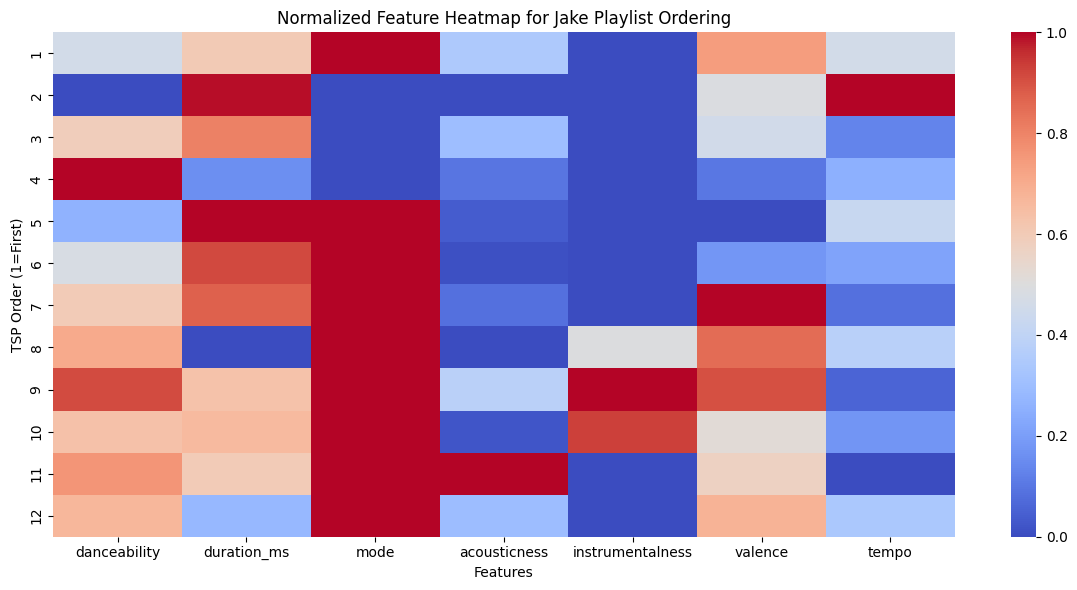

In [72]:
print_tsp_costs_for_params(words_df, jake_params, genre_distance_matrix, "Jake")


For Jake, it's pretty clear that the ideal adjacencies largely are between songs of similar mood/`valence` (i.e. "Memories" and "You Proof") and `genres` (i.e. dance songs from 7-11). Remember, the order presented doesn't really matter though due to the `cycle=True` setting, so based on Jake's preferences he should probably start on song 6 and go backwards (or 7 and go forwards). I wasn't able to get `genre` into the heatmap since it's categorical, so perhaps I'm missing some intuition from that lack in interprable visualization.

Cycle detected in TSP solution. Cost includes return to start.

Optimal Order for Stacy
1. Lucky
2. Centuries
3. Ten Feet Tall
4. Just the Way You Are
5. Drip Too Hard
6. Stay
7. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
8. You Proof
9. Memories
10. Gasolina
11. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
12. Hot in It
Total distance: 48.31215282368967 



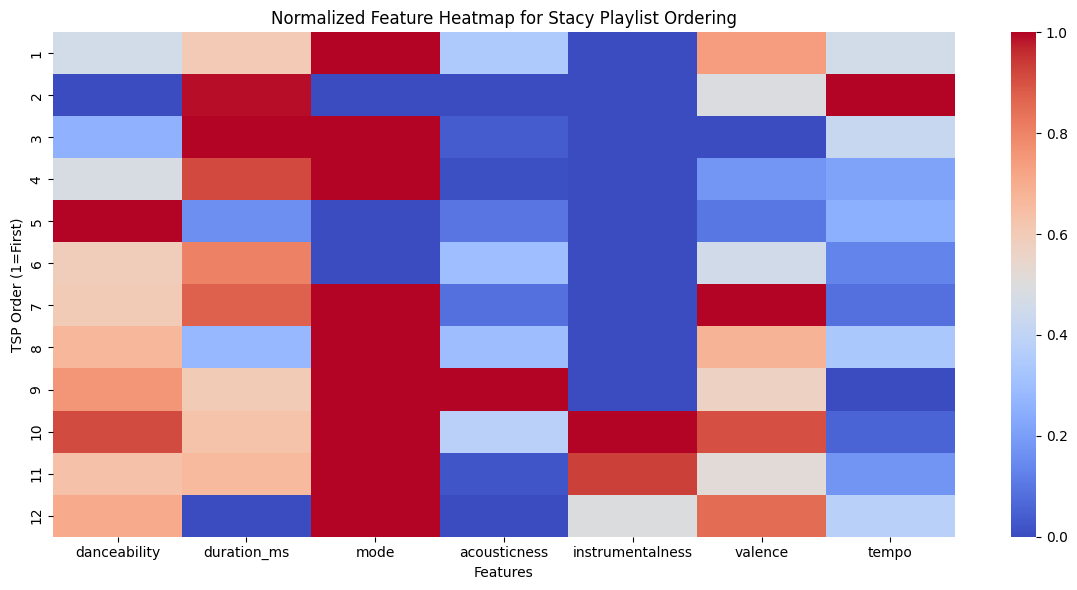

In [73]:
print_tsp_costs_for_params(words_df, stacy_params, genre_distance_matrix, "Stacy")

Looks about what I'd expect for Stacy. The columns for `acousticness` and `tempo` are pretty much organized so that successive songs have the smallest difference between them along those feature values.

Cycle detected in TSP solution. Cost includes return to start.

Optimal Order for Rosh
1. Lucky
2. Centuries
3. Ten Feet Tall
4. Just the Way You Are
5. Stay
6. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
7. Memories
8. Drip Too Hard
9. You Proof
10. Hot in It
11. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
12. Gasolina
Total distance: 7.899273741393111 



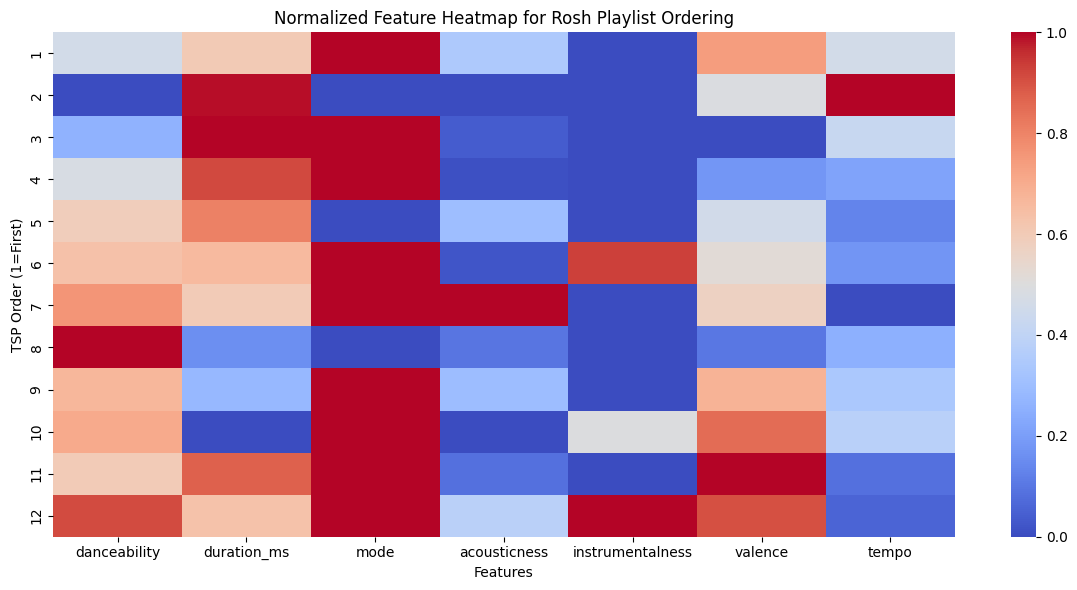

In [74]:
print_tsp_costs_for_params(words_df, rosh_params, genre_distance_matrix, "Rosh")    

Yup, all the dance songs are pretty much grouped together from 6-12. Interestingly, I think my stark parameter choices/neglections result in a worse-off playlist order because there's little balance across other parameters to help organize songs that are far from others in terms of `valence` and `danceability`. The result is a somewhat disjointed playlist, which is very apparent in "You Proof" being between "Drip Too Hard" and "Hot in It".

I'll make sure to inform users that setting too many hyperparameters to zero may worsen ordering quality by making outlier songs appear isolated, and thus more likely to be distastefully sprinkled into the middle of an ordered list by the TSP solution to minimize total squared distance traversed.

Cycle detected in TSP solution. Cost includes return to start.

Optimal Order for Riya
1. Lucky
2. Memories
3. Gasolina
4. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
5. Hot in It
6. You Proof
7. Drip Too Hard
8. Stay
9. Centuries
10. Ten Feet Tall
11. Just the Way You Are
12. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
Total distance: 49.88429854217381 



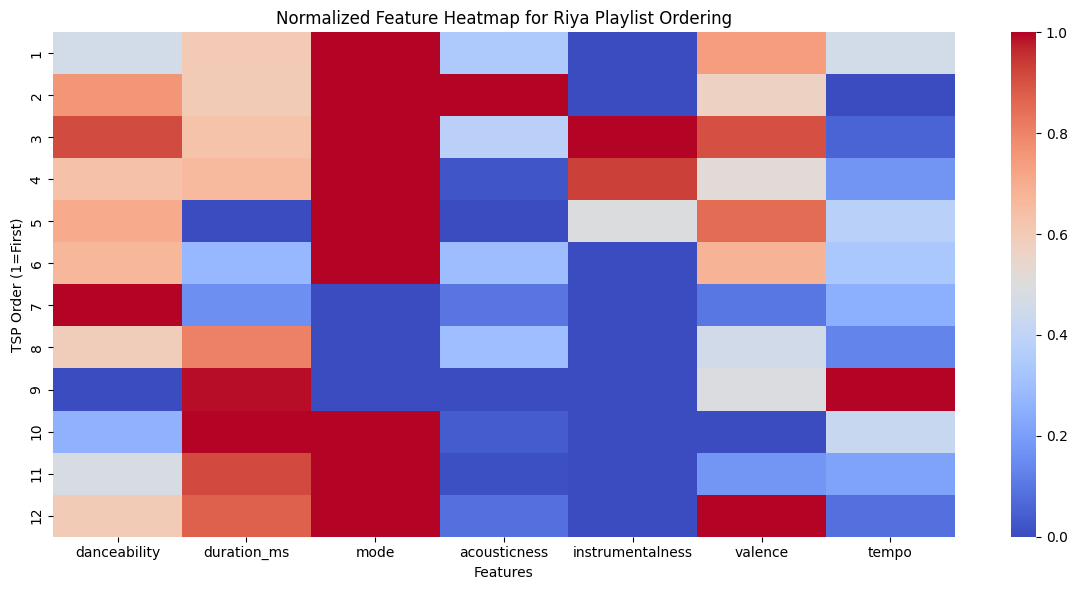

In [75]:
print_tsp_costs_for_params(words_df, riya_params, genre_distance_matrix, "Riya")

Riya probably has the most balanced preferences, so it's harder to notice glaringly obvious patterns in her prioritized features. Especially in `mode`, which is a binary variable and overarchingly major in this playlist (75% of songs). The `duration_ms` gradient seems reasonably smooth, although not as smooth as possible (likely due to the effects of having neutral values for other hypeparameters).

Cycle detected in TSP solution. Cost includes return to start.

Optimal Order for Road Trip
1. Lucky
2. You Proof
3. Memories
4. Drip Too Hard
5. Stay
6. Centuries
7. Ten Feet Tall
8. Just the Way You Are
9. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
10. Hot in It
11. Gasolina
12. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
Total distance: 38.709764136026116 



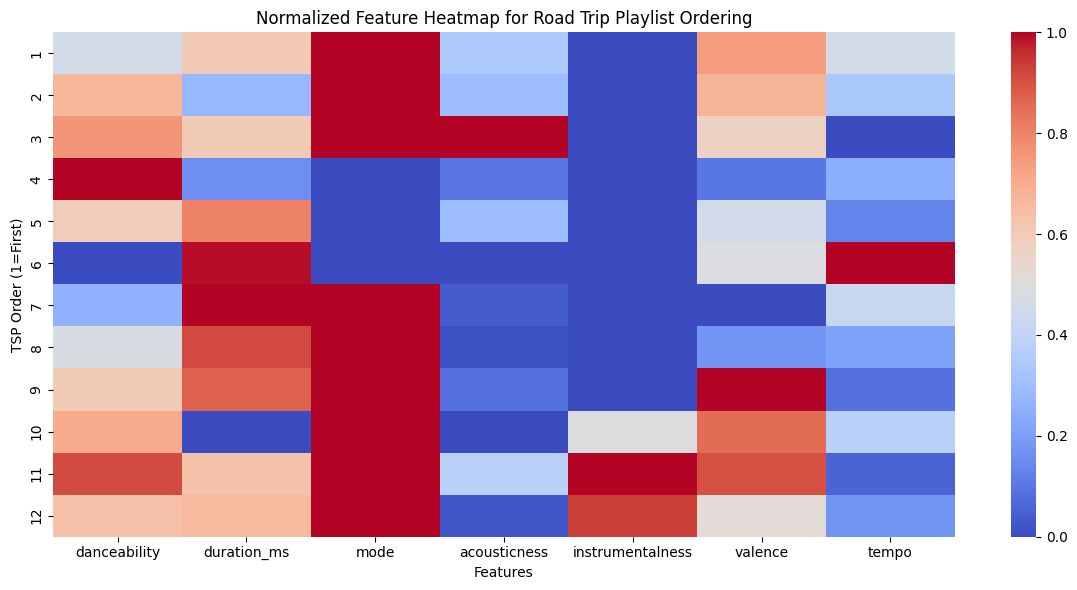

In [76]:
print_tsp_costs_for_params(words_df, road_trip_params, genre_distance_matrix, "Road Trip")

As expected, the aggregated preferences are all over the place. No feature dominates as much as in the individual cases. The `danceability` and `valence` gradients look relatively smooth compared to the others based on the aggregate hyperparameters. But, clearly the other parameters have some rounding effects because the transition between tracks 6-7 appear surprisingly distant on the `danceability` front, and between tracks 3-4 appears a bit suspicious on the `valence` front.

## TSP Path Type

Perhaps one of the biggest decisions I made is that the playlist should be presented in a way where starting point is arbitrary. By setting `cycle=True` while solving the TSP with no repeats (besides the start/terminal node), I effectively provide an "optimal" playlist order robust to variance in the starting point. I mentioned before that following a full loop in the cycle (stopping after the first song repeats) gives the same path cost no matter the starting point since every edge cost in the cycle is incurred once.

Although the `cycle` case was nice for intuition and user optionality, it's definitely a big assumption. Who am I to say that users actually want to pick their first song? And realistically, how many music streamers actually make it all the way through their loop during a listening session? I will now analyze my model's performance under a `cycle=False` TSP solution, examining the output differences under a more strict linear ordering regime that stops before repeating the first song. Now, no edge cost will be incurred for looping track numer $s$ (12 in the above section) back to 1 since that loop simply doesn't happen.

In [83]:
import networkx as nx

def solve_tsp_open(G):
    """
    Solves the TSP using NetworkX's approximation algorithm in open-path mode (no cycle).
    Ensures:
    - No internal node duplicates
    - Returns a strict linear path (no return to start)
    - Correct path cost calculation

    Parameters:
        G (networkx.Graph): Fully connected graph with weighted edges.

    Returns:
        tsp_path (list): Ordered list of nodes (no internal duplicates).
        tsp_cost (float): Total cost of the tour.
    """
    # Forceing cycle=False
    tsp_raw = nx.approximation.traveling_salesman_problem(G, weight='weight', cycle=False)

    # Ensure no internal duplicates
    seen = set()
    tsp_path = []
    for node in tsp_raw:
        if node not in seen:
            seen.add(node)
            tsp_path.append(node)

    # Final validation
    if len(set(tsp_path)) != len(tsp_path):
        raise ValueError("TSP result contains internal duplicate nodes.")

    # Compute total cost (no return to start)
    tsp_cost = sum(G[u][v]['weight'] for u, v in zip(tsp_path, tsp_path[1:]))

    return tsp_path, tsp_cost


In [84]:
# Solve TSP for words and nowords graphs
path_words, cost_words = solve_tsp_open(G_words)
path_nowords, cost_nowords = solve_tsp_open(G_nowords)

In [86]:
print("Words Playlist (TSP Order):")
for i, track in enumerate(path_words, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_words)

print("\nNo-Words Playlist (TSP Order):")
for i, track in enumerate(path_nowords, 1):
    print(f"{i}. {track}")
print("Total distance:", cost_nowords)

Words Playlist (TSP Order):
1. Centuries
2. Stay
3. Drip Too Hard
4. Just the Way You Are
5. Ten Feet Tall
6. Swalla (feat. Nicki Minaj & Ty Dolla $ign)
7. You Proof
8. Memories
9. Gasolina
10. Hey Ma (with J Balvin & Pitbull feat. Camila Cabello)
11. Hot in It
12. Lucky
Total distance: 35.881354309552385

No-Words Playlist (TSP Order):
1. Das Lied von der Erde: No. 2, Der Einsame im Herbst
2. Peer Gynt Suite No. 1, Op. 46: 4. In The Hall Of The Mountain King
3. Tchaikovsky: Swan Lake, Op. 20, Act II: No. 10, Scene. Moderato
4. Cello Suite No. 1 in G Major, BWV 1007: I. Prélude
5. 21 Hungarian Dances, WoO 1: No. 5 in G Minor: Allegro
6. Horn Concerto No. 4 in E flat, K.495: 3. Rondo (Allegro vivace)
7. Carmen: "Habanera"
8. Le carnaval des animaux, R. 125: IV. Tortues - V. L'Éléphant - VI. Kangourous
9. The Truman Show: Truman Sleeps - Short Version
10. Piano Sonata No. 2 in B-Flat Minor, Op. 36: I. Allegro agitato
11. Richard Wagner / Die Meistersinger von Nürnberg - Overture
12. Viol

The optimal playlist orderings did change quite a bit from the earlier `cycle=True` case. However, it seems like the new ordered lists are simply translated versions of the old ones, with tracks maintaining the same neighboring tracks as before (except for one neighbor swap in the No-Words Playlist). That's a good result, as it demonstrates the difference in optimal orderings between the `cycle` and `non-cycle` cases hinges on the starting song, as expected. The fact that track neighborhoods remained largely intact between the `cycle=True` and `cycle=False` cases indicates that my model’s local transition logic is stable and not overly dependent on arbitrary starting points.

The total distance traveled is slightly lower among both of the `non-cycle` orderings. That small drop is largely expected though, since there's one fewer song in the path without a loop back to the top of the list.